# Práctica 1:
# Primero guardar el DF Semestre , guardar un fichero .xlsx solamente de los pedidos cuya categoría sea Seafood o Beverages, poner nombre de hoja "Pedidos A"

In [37]:
import pandas as pd
fichero = r"C:\Users\javie\Downloads\pedidos.xlsx"
pedidos=pd.read_excel(fichero, sheet_name="Pedidos A")  
pedidos 

,Unnamed: 0,Discount,Amount,Order Date,Ship Country,Ship City,Customer,Quantity,Unit Price,Category,Product,Order ID
0,6,0.000,77.0,2014-08-08,Brazil,Rio de Janeiro,Hanari Carnes,10,7.7,Seafood,Jack's New England Clam Chowder,10250
1,15,16.632,604.8,2014-08-10,Brazil,Rio de Janeiro,Hanari Carnes,42,14.4,Beverages,Chartreuse verte,10253
2,19,0.000,54.0,2014-08-11,Switzerland,Bern,Chop-suey Chinese,15,3.6,Beverages,Guaraná Fantástica,10254
3,21,8.360,304.0,2014-08-12,Switzerland,Genève,Richter Supermarkt,20,15.2,Beverages,Chang,10255
4,23,10.450,380.0,2014-08-12,Switzerland,Genève,Richter Supermarkt,25,15.2,Seafood,Inlagd Sill,10255
...,...,...,...,...,...,...,...,...,...,...,...,...
114,315,0.000,36.0,2014-12-29,Mexico,México D.F.,Tortuga Restaurante,10,3.6,Beverages,Guaraná Fantástica,10293
115,317,0.000,37.2,2014-12-29,Mexico,México D.F.,Tortuga Restaurante,6,6.2,Beverages,Rhönbräu Klosterbier,10293
116,319,0.000,37.2,2014-12-30,USA,Albuquerque,Rattlesnake Canyon Grocery,6,6.2,Beverages,Rhönbräu Klosterbier,10294
117,320,15.180,552.0,2014-12-30,USA,Albuquerque,Rattlesnake Canyon Grocery,15,36.8,Beverages,Ipoh Coffee,10294


# Crear un DF que contenga el promedio de amount - discount agrupado por Ship Country. Guardar este fichero en formato csv separado por comas.


In [38]:
pedidos["Amount_net"]= round(pedidos["Amount"] - pedidos["Discount"],2)
pedidos

,Unnamed: 0,Discount,Amount,Order Date,Ship Country,Ship City,Customer,Quantity,Unit Price,Category,Product,Order ID,Amount_net
0,6,0.000,77.0,2014-08-08,Brazil,Rio de Janeiro,Hanari Carnes,10,7.7,Seafood,Jack's New England Clam Chowder,10250,77.00
1,15,16.632,604.8,2014-08-10,Brazil,Rio de Janeiro,Hanari Carnes,42,14.4,Beverages,Chartreuse verte,10253,588.17
2,19,0.000,54.0,2014-08-11,Switzerland,Bern,Chop-suey Chinese,15,3.6,Beverages,Guaraná Fantástica,10254,54.00
3,21,8.360,304.0,2014-08-12,Switzerland,Genève,Richter Supermarkt,20,15.2,Beverages,Chang,10255,295.64
4,23,10.450,380.0,2014-08-12,Switzerland,Genève,Richter Supermarkt,25,15.2,Seafood,Inlagd Sill,10255,369.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,315,0.000,36.0,2014-12-29,Mexico,México D.F.,Tortuga Restaurante,10,3.6,Beverages,Guaraná Fantástica,10293,36.00
115,317,0.000,37.2,2014-12-29,Mexico,México D.F.,Tortuga Restaurante,6,6.2,Beverages,Rhönbräu Klosterbier,10293,37.20
116,319,0.000,37.2,2014-12-30,USA,Albuquerque,Rattlesnake Canyon Grocery,6,6.2,Beverages,Rhönbräu Klosterbier,10294,37.20
117,320,15.180,552.0,2014-12-30,USA,Albuquerque,Rattlesnake Canyon Grocery,15,36.8,Beverages,Ipoh Coffee,10294,536.82


In [49]:
df_promamount = pedidos.groupby(["Ship Country"]).Amount_net.mean()
df_promamount = pd.DataFrame(df_promamount,columns=["Amount_net"])
df_promamount

,Amount_net
Ship Country,
Austria,682.580000
Belgium,429.460000
Brazil,198.250000
Finland,669.080000
France,533.510000
Germany,555.036207
Ireland,632.773333
Italy,43.200000
Mexico,192.953529


In [40]:
df_promamount = df_promamount.reset_index()
df_promamount["Amount_net"] = round(df_promamount["Amount_net"],2)
df_promamount

,Ship Country,Amount_net
0,Austria,682.58
1,Belgium,429.46
2,Brazil,198.25
3,Finland,669.08
4,France,533.51
5,Germany,555.04
6,Ireland,632.77
7,Italy,43.20
8,Mexico,192.95
9,Spain,126.28


In [41]:
df_promamount.to_csv(r"C:\Users\javie\Downloads\df_promamount.csv", sep=",", index=True)
print("Conseguido con Éxito")

Conseguido con Éxito


# Generar un Pie para ver el % de promedio por Ship Country. Poner como  título al gráfico "Promedio de Ventas por país"

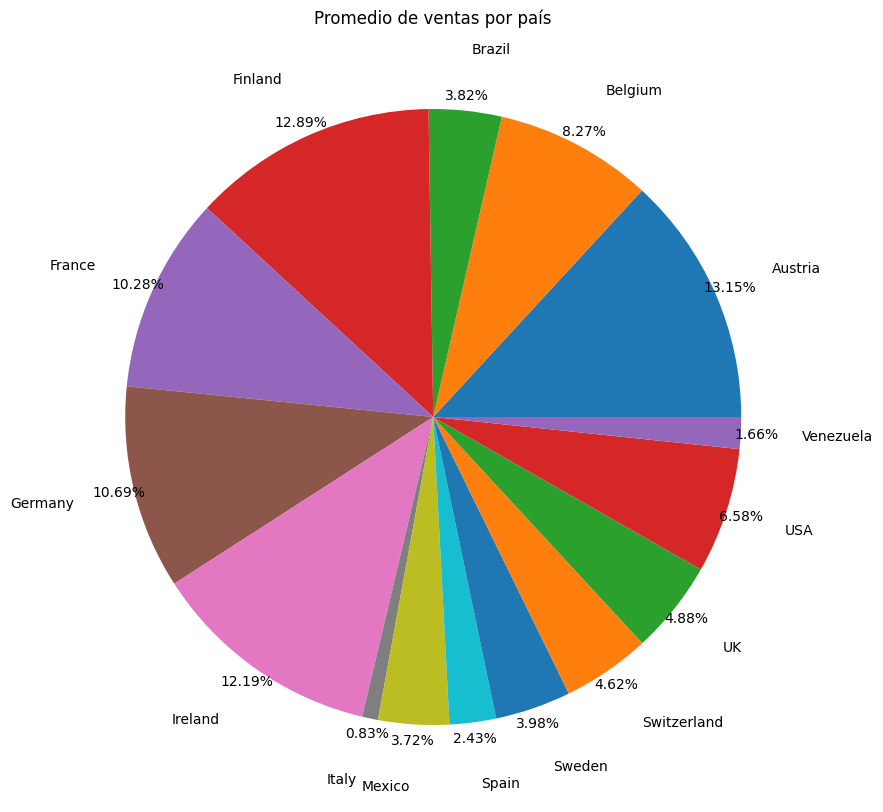

CONSEGUIDO CON ÉXITO


In [42]:
import matplotlib.pyplot as plt 
fig, plot = plt.subplots()   
fig.set_size_inches(10,10)
plot.pie(df_promamount["Amount_net"],labels=df_promamount["Ship Country"],autopct="%.2f%%",pctdistance=1.05,labeldistance=1.2)
plot.set_title("Promedio de ventas por país")
plt.show()
print("CONSEGUIDO CON ÉXITO")


# PÁCTICA 2:
# Aprovechando el DF que contiene las catégorias Seafood + Beverages , crear un DF que contenga la suma de amount por Ship Country , añadiendole una columna que me muestre el porcentaje de cada Ship Country con respecto al total.

In [43]:
pedidos

,Unnamed: 0,Discount,Amount,Order Date,Ship Country,Ship City,Customer,Quantity,Unit Price,Category,Product,Order ID,Amount_net
0,6,0.000,77.0,2014-08-08,Brazil,Rio de Janeiro,Hanari Carnes,10,7.7,Seafood,Jack's New England Clam Chowder,10250,77.00
1,15,16.632,604.8,2014-08-10,Brazil,Rio de Janeiro,Hanari Carnes,42,14.4,Beverages,Chartreuse verte,10253,588.17
2,19,0.000,54.0,2014-08-11,Switzerland,Bern,Chop-suey Chinese,15,3.6,Beverages,Guaraná Fantástica,10254,54.00
3,21,8.360,304.0,2014-08-12,Switzerland,Genève,Richter Supermarkt,20,15.2,Beverages,Chang,10255,295.64
4,23,10.450,380.0,2014-08-12,Switzerland,Genève,Richter Supermarkt,25,15.2,Seafood,Inlagd Sill,10255,369.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,315,0.000,36.0,2014-12-29,Mexico,México D.F.,Tortuga Restaurante,10,3.6,Beverages,Guaraná Fantástica,10293,36.00
115,317,0.000,37.2,2014-12-29,Mexico,México D.F.,Tortuga Restaurante,6,6.2,Beverages,Rhönbräu Klosterbier,10293,37.20
116,319,0.000,37.2,2014-12-30,USA,Albuquerque,Rattlesnake Canyon Grocery,6,6.2,Beverages,Rhönbräu Klosterbier,10294,37.20
117,320,15.180,552.0,2014-12-30,USA,Albuquerque,Rattlesnake Canyon Grocery,15,36.8,Beverages,Ipoh Coffee,10294,536.82


In [54]:
df_final = pedidos.groupby(["Ship Country"]).Amount.sum()
df_final = pd.DataFrame(df_final,columns=["Amount"])
df_final = df_final.reset_index()
df_final["Porcentaje"] = round(df_final["Amount"]*100/(df_final["Amount"].sum()),2)
df_final

,Ship Country,Amount,Porcentaje
0,Austria,2102.8,4.95
1,Belgium,441.6,1.04
2,Brazil,2601.8,6.13
3,Finland,4128.0,9.73
4,France,1104.0,2.60
5,Germany,16654.0,39.24
6,Ireland,1952.0,4.60
7,Italy,129.6,0.31
8,Mexico,3360.4,7.92
9,Spain,1405.2,3.31
